In [17]:
import nltk
import pandas as pd
import re
import random
import matplotlib.pyplot as plt
import numpy as np
from nltk.corpus import stopwords
#transform
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.cluster import KMeans

df = pd.read_csv('df_comb_v2.csv')
print(df.columns)
df.head()


Index(['id', 'name', 'popularity', 'duration_ms', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'time_signature', 'SLink', 'Lyric',
       'language', 'Genres', 'clean lyric'],
      dtype='object')


,id,name,popularity,duration_ms,explicit,artists,id_artists,release_date,danceability,energy,...,instrumentalness,liveness,valence,tempo,time_signature,SLink,Lyric,language,Genres,clean lyric
0,6tDDoYIxWvMLTdKpjFkc1B,telepatía,97,160191,0,kali uchis,['1U1el3k54VvEUzo3ybLPlM'],2020-12-04,0.653,0.524,...,0.000000,0.2030,0.553,83.970,4,/kali-uchis/telepatia.html,Quién lo diría\nQue se podría\nHacer el amor p...,es,"['R&B', ' Chillout', ' Pop']",quién lo diría que se podría hacer el amor por...
1,1XXimziG1uhM0eDNCZCrUl,Up,92,156945,1,cardi b,['4kYSro6naA4h99UJvo89HB'],2021-02-05,0.868,0.795,...,0.019300,0.0461,0.819,166.000,4,/cardi-b/up.html,"Up, up, up (Ayy) , up (Uh) , up, look (This is...",en,"['Hip Hop', ' Rap']",ayy uh look fire upon time man heard ugly came...
2,35mvY5S1H3J2QZyna3TFe0,positions,92,172325,1,ariana grande,['66CXWjxzNUsdJxJ2JdwvnR'],2020-10-30,0.737,0.802,...,0.000000,0.0931,0.682,144.015,4,/ariana-grande/positions.html,Heaven sent you to me\nI'm just hopin' I don't...,en,"['Pop', ' Dance', ' Romântico']",heaven sent im hopin dont repeat history boy i...
3,4u4NyuceXP7Uzh7XFJKCr1,Hold On,92,170813,0,justin bieber,['1uNFoZAHBGtllmzznpCI3s'],2021-03-05,0.658,0.634,...,0.000000,0.1320,0.290,139.980,4,/justin-bieber/hold-on.html,You know you can call me if you need someone\n...,en,"['Dance', ' Pop', ' Romântico']",know call need someone ill pick piece come und...
4,1tkg4EHVoqnhR6iFEXb60y,What You Know Bout Love,91,160000,1,pop smoke,['0eDvMgVFoNV3TpwtrVCoTj'],2020-07-03,0.709,0.548,...,0.000002,0.1330,0.543,83.995,4,/pop-smoke/what-you-know-bout-love.html,Shawty go jogging every morning (every morning...,en,"['Trap', ' Hip Hop']",shawty go jogging every morning every morning ...


Clustering by the song's sound features
- danceability
- energy
- key
- loudness
- mode
- speechiness
- acousticness
- instrumentalness
- liveness
- valence
- tempo
Run Elbow Method to determine what's the best cluster number for the dataset

/Users/haozhiliao/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haozhiliao/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haozhiliao/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/Users/haozhiliao/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warni

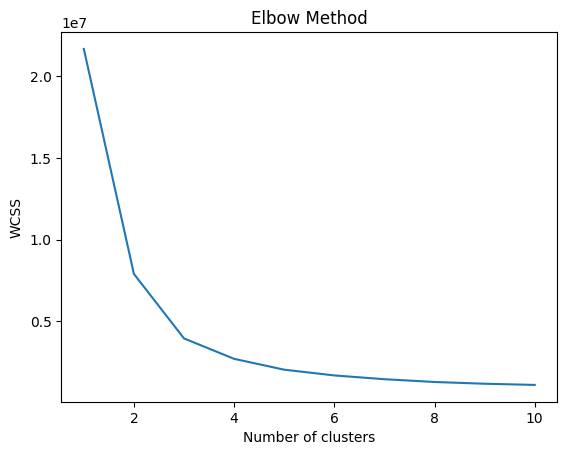

In [19]:
from sklearn.cluster import KMeans

clustering_cols = ['danceability', 'energy', 'key',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo']
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(df[clustering_cols])
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot, there would be 4 clusters.
Then run the KMeans to assign the cluster to each song and add the dataframe

In [22]:
kmeans = KMeans(n_clusters=4)
predicted_cluster = kmeans.fit_predict(df[clustering_cols])
df['cluster'] = predicted_cluster
print(df['cluster'].value_counts())
df.head()
df.to_csv('df_clustered.csv', index=False)

/Users/haozhiliao/Library/Python/3.8/lib/python/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


cluster
2    7595
0    6881
3    6707
1    3177
Name: count, dtype: int64
